In [23]:
# 必要なライブラリのインポート
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# CSVを読み込む
df = pd.read_csv('Cars.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [37]:
# MSRP,Invoiceをreplaceを使って数値に変換
df['MSRP'] = df['MSRP'].replace('[\$,]', '', regex=True).astype(float)
df['Invoice'] = df['Invoice'].replace('[\$,]', '', regex=True).astype(float)

In [62]:
# カテゴリカルデータのLabelEncoding
categorical_columns = ['Make', 'Model', 'Type', 'Origin', 'DriveTrain']
label_encoder = {}
for column in categorical_columns:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoder[column] = le

In [43]:
df = df.dropna()

In [44]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0,229,1,0,0,36945.0,33337.0,3.5,6.0,265,17,23,4451,106,189
1,0,293,2,0,1,23820.0,21761.0,2.0,4.0,200,24,31,2778,101,172
2,0,366,2,0,1,26990.0,24647.0,2.4,4.0,200,22,29,3230,105,183
3,0,365,2,0,1,33195.0,30299.0,3.2,6.0,270,20,28,3575,108,186
4,0,0,2,0,1,43755.0,39014.0,3.5,6.0,225,18,24,3880,115,197


In [45]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
X = df.to_numpy()
scaler.fit(X)

StandardScaler()

In [47]:
X_scaled = scaler.transform(X)
X_scaled

array([[-1.50039762,  0.14761554, -1.24233486, ...,  1.14697157,
        -0.26012678,  0.17978113],
       [-1.50039762,  0.6689355 , -0.27126211, ..., -1.05730932,
        -0.86107044, -1.00490946],
       [-1.50039762,  1.26356607, -0.27126211, ..., -0.46177139,
        -0.38031551, -0.23834496],
       ...,
       [ 1.63652602,  0.9051586 , -0.27126211, ...,  0.09555725,
         0.22062814,  0.24946881],
       [ 1.63652602,  1.45091543,  2.64195616, ..., -0.9993366 ,
        -0.86107044, -0.447408  ],
       [ 1.63652602,  1.55680855,  2.64195616, ...,  0.31954276,
         0.10043941, -0.02928191]])

In [48]:
# エルボー法のためのSSEを計算
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(df)
  sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

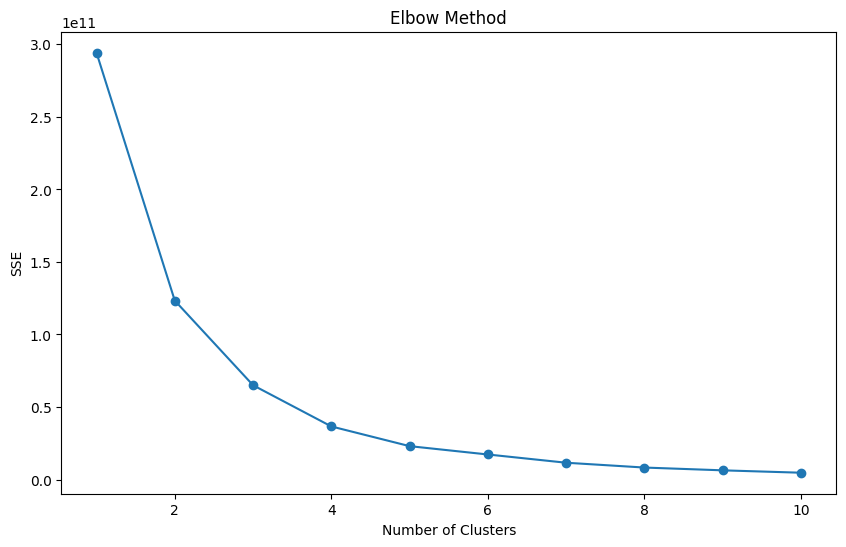

In [49]:
# エルボー法の結果をプロット
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show

In [50]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [51]:
model.labels_

array([2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0,
       0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0,

In [53]:
# ラベル情報を追加
df['cluster'] = model.labels_
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,cluster
0,0,229,1,0,0,36945.0,33337.0,3.5,6.0,265,17,23,4451,106,189,2
1,0,293,2,0,1,23820.0,21761.0,2.0,4.0,200,24,31,2778,101,172,0
2,0,366,2,0,1,26990.0,24647.0,2.4,4.0,200,22,29,3230,105,183,2
3,0,365,2,0,1,33195.0,30299.0,3.2,6.0,270,20,28,3575,108,186,2
4,0,0,2,0,1,43755.0,39014.0,3.5,6.0,225,18,24,3880,115,197,2


<Axes: xlabel='cluster', ylabel='count'>

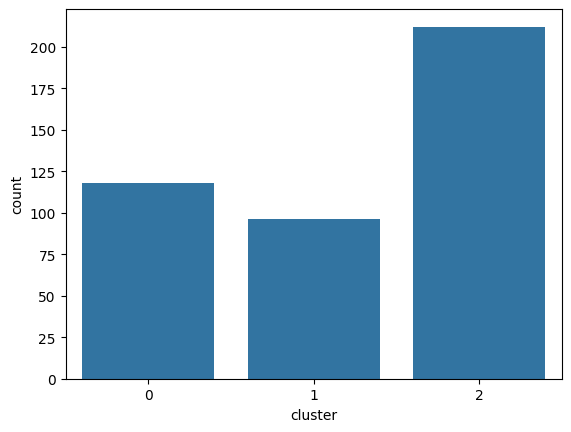

In [54]:
# クラスター別のデータ数確認
sns.countplot(x='cluster', data=df)

In [55]:
# クラスター別の平均値の比較
df.groupby('cluster').mean()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
cluster,,,,,,,,,,,,,,,
0,22.406780,213.338983,2.364407,0.627119,0.949153,18241.067797,16933.889831,2.023729,4.025424,142.050847,25.966102,32.855932,2792.635593,101.279661,174.271186
1,14.156250,237.572917,2.187500,1.322917,1.177083,54874.197917,49933.531250,4.760417,8.020833,308.583333,15.614583,21.572917,4445.625000,115.135417,198.114583
2,16.679245,197.419811,2.273585,1.018868,1.023585,30916.834906,28327.834906,3.159434,5.797170,214.990566,18.806604,25.905660,3627.221698,108.839623,187.886792


<Axes: xlabel='MSRP', ylabel='EngineSize'>

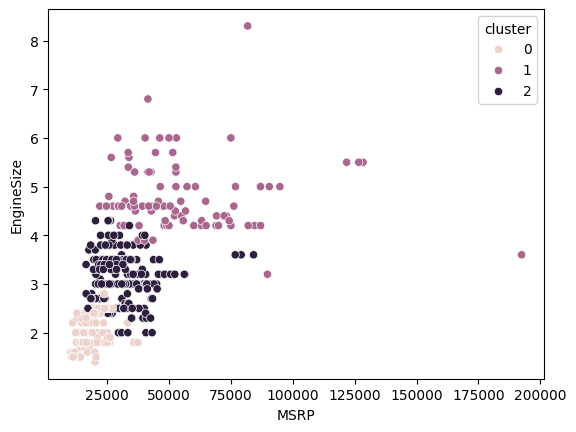

In [56]:
# clusterとMSRP,EngineSizeの関係の確認
sns.scatterplot(x='MSRP', y='EngineSize', hue='cluster', data=df)

In [57]:
# clsuter2でMSRPが70000以上のデータを抽出
df[df['cluster'] == 2][df['MSRP'] >= 70000]

<ipython-input-57-8ac280748ee5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['cluster'] == 2][df['MSRP'] >= 70000]


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,cluster
331,29,29,3,1,2,79165.0,69229.0,3.6,6.0,315,18,26,3135,93,175,2
332,29,28,3,1,0,84165.0,72206.0,3.6,6.0,315,17,24,3240,93,175,2
333,29,31,3,1,2,76765.0,67128.0,3.6,6.0,315,18,26,3119,93,175,2


<Axes: xlabel='MSRP', ylabel='Horsepower'>

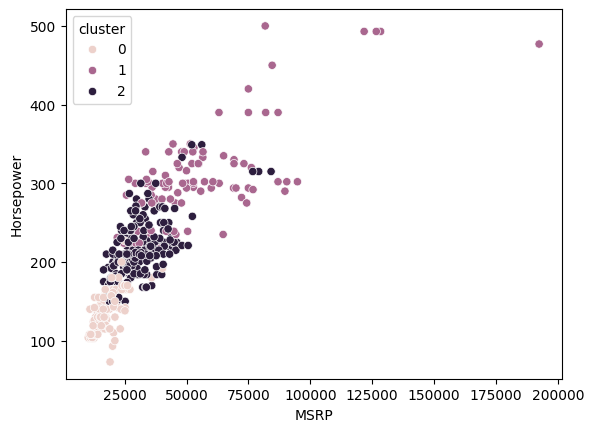

In [58]:
# clusterとMSRP,Horsepowerの関係を確認
sns.scatterplot(x='MSRP', y='Horsepower', hue='cluster', data=df)

<Axes: xlabel='EngineSize', ylabel='Horsepower'>

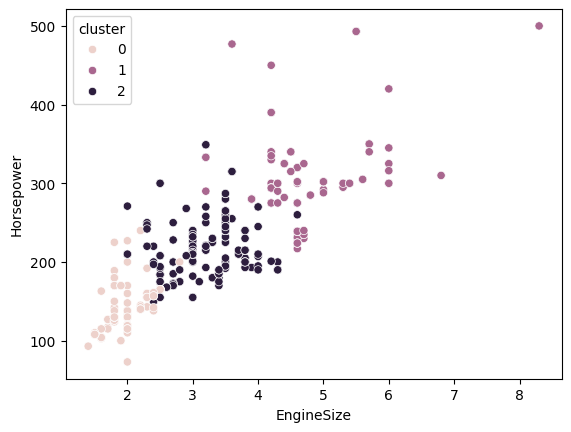

In [59]:
# EngineSizeとHorsepowerの関係の確認
sns.scatterplot(x='EngineSize', y='Horsepower', hue='cluster', data=df)